In [1]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import statsmodels.api as sm
import statistics
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import cross_val_score

# Scikit-learn
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
file_path = "/Users/igmark/Desktop/WGU PA/D214/Natality_2020.csv"
df = pd.read_csv(file_path)

In [3]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180992 entries, 0 to 180991
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     180992 non-null  int64  
 1   birth_year             180992 non-null  int64  
 2   birth_month            180992 non-null  int64  
 3   birth_time             180969 non-null  float64
 4   birth_place            180977 non-null  float64
 5   mother_age             180992 non-null  int64  
 6   marital_status         180992 non-null  object 
 7   mother_education       178448 non-null  float64
 8   father_age             158408 non-null  float64
 9   father_education       154379 non-null  float64
 10  interval_llb           175142 non-null  float64
 11  cigarettes             180231 non-null  float64
 12  mother_height          180095 non-null  float64
 13  mother_bmi             177419 non-null  float64
 14  pre_preg_weight        177917 non-nu

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
180987    False
180988    False
180989    False
180990    False
180991    False
Length: 180992, dtype: bool

### Sparsity

In [5]:
# Calculate missing value percentages for each variable
missing_percentages = df.isnull().sum() / len(df) * 100

# Sort variables based on missing value percentages
missing_percentages = missing_percentages.sort_values(ascending=False)

# Print the results
print(missing_percentages)

father_education         14.703965
father_age               12.477900
interval_llb              3.232187
mother_bmi                1.974120
pre_preg_weight           1.698970
mother_education          1.405587
delivery_weight           1.144802
apgar10                   0.504442
mother_height             0.495602
apgar5                    0.427091
cigarettes                0.420461
hepatitis_c               0.318246
hepatitis_b               0.318246
chlamydia                 0.318246
syphilis                  0.318246
gonorrhea                 0.318246
infertility_treatment     0.125972
gest_hypertension         0.125972
prev_preterm_birth        0.125972
pre_preg_diabetes         0.125972
pre_preg_hypertension     0.125972
gest_diabetes             0.125972
anesthesia                0.060224
chorioamnionitis          0.060224
labor_induction           0.060224
labor_augmentation        0.060224
steroids                  0.060224
antibiotics               0.060224
birth_time          

In [6]:
# Calculate the percentage of missing values for the entire dataset
total_missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100

# Print the result
print("Data Sparsity: {:.2f}%".format(total_missing_percentage))

Data Sparsity: 1.06%


### Missing Values

In [7]:
print(df.shape)

(180992, 39)


In [8]:
df.isnull().sum()

id                           0
birth_year                   0
birth_month                  0
birth_time                  23
birth_place                 15
mother_age                   0
marital_status               0
mother_education          2544
father_age               22584
father_education         26613
interval_llb              5850
cigarettes                 761
mother_height              897
mother_bmi                3573
pre_preg_weight           3075
delivery_weight           2072
pre_preg_diabetes          228
gest_diabetes              228
pre_preg_hypertension      228
gest_hypertension          228
prev_preterm_birth         228
infertility_treatment      228
prev_cesarian                0
gonorrhea                  576
syphilis                   576
chlamydia                  576
hepatitis_b                576
hepatitis_c                576
labor_induction            109
labor_augmentation         109
steroids                   109
antibiotics                109
chorioam

In [9]:
#Remove rows with >25% of missing data (Collins et al., 2001)

# Identify rows with more than 25% missing values
rows_to_delete = missing_percentages[missing_percentages > 25].index

# Delete the identified rows from the DataFrame
df = df.drop(rows_to_delete, axis=0)

# Optional: Reset the index if needed
df = df.reset_index(drop=True)

# Check the resulting DataFrame
df


,id,birth_year,birth_month,birth_time,birth_place,mother_age,marital_status,mother_education,father_age,father_education,...,labor_augmentation,steroids,antibiotics,chorioamnionitis,anesthesia,apgar5,apgar10,plurality,gender,infant_weight
0,1,2020,1,1123.0,1.0,25,1,3.0,30.0,3.0,...,N,N,Y,Y,Y,8.0,88.0,1,M,3570
1,2,2020,1,1345.0,1.0,19,2,2.0,34.0,3.0,...,Y,N,N,N,Y,9.0,88.0,1,F,3440
2,3,2020,1,726.0,3.0,34,1,6.0,38.0,6.0,...,N,N,N,N,N,8.0,88.0,1,M,4423
3,4,2020,1,329.0,1.0,25,1,4.0,21.0,4.0,...,N,N,N,N,N,9.0,88.0,1,M,2744
4,5,2020,1,2333.0,1.0,25,1,4.0,28.0,3.0,...,N,N,N,N,Y,9.0,88.0,1,F,3425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180987,180988,2020,9,1857.0,1.0,25,2,2.0,NaN,NaN,...,N,N,Y,N,Y,10.0,88.0,2,M,1871
180988,180989,2020,12,1110.0,1.0,19,1,NaN,22.0,2.0,...,N,N,N,N,Y,8.0,88.0,1,M,3815
180989,180990,2020,12,1424.0,1.0,30,2,NaN,33.0,NaN,...,N,N,N,N,Y,9.0,88.0,1,M,4170
180990,180991,2020,10,2245.0,3.0,38,1,8.0,40.0,6.0,...,N,N,N,N,Y,9.0,88.0,1,F,4196


In [10]:
print(df.shape)

(180992, 39)


In [11]:
df.isnull().sum()

id                           0
birth_year                   0
birth_month                  0
birth_time                  23
birth_place                 15
mother_age                   0
marital_status               0
mother_education          2544
father_age               22584
father_education         26613
interval_llb              5850
cigarettes                 761
mother_height              897
mother_bmi                3573
pre_preg_weight           3075
delivery_weight           2072
pre_preg_diabetes          228
gest_diabetes              228
pre_preg_hypertension      228
gest_hypertension          228
prev_preterm_birth         228
infertility_treatment      228
prev_cesarian                0
gonorrhea                  576
syphilis                   576
chlamydia                  576
hepatitis_b                576
hepatitis_c                576
labor_induction            109
labor_augmentation         109
steroids                   109
antibiotics                109
chorioam

#### Treat Missing Values 

In [12]:
# Detect missing values
missing_values = df.isnull().any(axis=1)

# Delete rows with missing values
df = df.dropna()


In [13]:
df.isnull().sum()

id                       0
birth_year               0
birth_month              0
birth_time               0
birth_place              0
mother_age               0
marital_status           0
mother_education         0
father_age               0
father_education         0
interval_llb             0
cigarettes               0
mother_height            0
mother_bmi               0
pre_preg_weight          0
delivery_weight          0
pre_preg_diabetes        0
gest_diabetes            0
pre_preg_hypertension    0
gest_hypertension        0
prev_preterm_birth       0
infertility_treatment    0
prev_cesarian            0
gonorrhea                0
syphilis                 0
chlamydia                0
hepatitis_b              0
hepatitis_c              0
labor_induction          0
labor_augmentation       0
steroids                 0
antibiotics              0
chorioamnionitis         0
anesthesia               0
apgar5                   0
apgar10                  0
plurality                0
g

### Statistics 

In [14]:
df.describe()

,id,birth_year,birth_month,birth_time,birth_place,mother_age,mother_education,father_age,father_education,interval_llb,cigarettes,mother_height,mother_bmi,pre_preg_weight,delivery_weight,prev_cesarian,apgar5,apgar10,plurality,infant_weight
count,144761.000000,144761.0,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000,144761.000000
mean,89882.060203,2020.0,6.504121,1230.318256,1.035997,29.572806,4.574865,31.881819,4.289222,380.026692,0.715193,64.133600,27.400499,160.483162,189.872583,0.001554,8.789384,87.161273,1.027618,3286.606386
std,52068.390975,0.0,3.418868,628.934976,0.300862,5.623284,1.741075,6.734524,1.745398,411.086556,3.927033,2.831993,6.726773,41.614455,41.044898,0.118263,0.755781,8.242547,0.168285,577.032914
min,1.000000,2020.0,1.000000,0.000000,1.000000,13.000000,1.000000,14.000000,1.000000,3.000000,0.000000,47.000000,13.100000,75.000000,100.000000,0.000000,0.000000,0.000000,1.000000,227.000000
25%,44780.000000,2020.0,4.000000,801.000000,1.000000,26.000000,3.000000,27.000000,3.000000,32.000000,0.000000,62.000000,22.500000,130.000000,160.000000,0.000000,9.000000,88.000000,1.000000,2984.000000
50%,89254.000000,2020.0,7.000000,1237.000000,1.000000,30.000000,4.000000,32.000000,4.000000,76.000000,0.000000,64.000000,25.800000,150.000000,183.000000,0.000000,9.000000,88.000000,1.000000,3317.000000
75%,135251.000000,2020.0,9.000000,1731.000000,1.000000,34.000000,6.000000,36.000000,6.000000,888.000000,0.000000,66.000000,31.000000,180.000000,212.000000,0.000000,9.000000,88.000000,1.000000,3636.000000
max,180987.000000,2020.0,12.000000,2359.000000,7.000000,50.000000,8.000000,79.000000,8.000000,888.000000,98.000000,78.000000,68.700000,375.000000,400.000000,9.000000,10.000000,88.000000,4.000000,9999.000000


### Detect Outliers

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'birth_year'}>,
        <AxesSubplot: title={'center': 'birth_month'}>,
        <AxesSubplot: title={'center': 'birth_time'}>],
       [<AxesSubplot: title={'center': 'birth_place'}>,
        <AxesSubplot: title={'center': 'mother_age'}>,
        <AxesSubplot: title={'center': 'mother_education'}>,
        <AxesSubplot: title={'center': 'father_age'}>],
       [<AxesSubplot: title={'center': 'father_education'}>,
        <AxesSubplot: title={'center': 'interval_llb'}>,
        <AxesSubplot: title={'center': 'cigarettes'}>,
        <AxesSubplot: title={'center': 'mother_height'}>],
       [<AxesSubplot: title={'center': 'mother_bmi'}>,
        <AxesSubplot: title={'center': 'pre_preg_weight'}>,
        <AxesSubplot: title={'center': 'delivery_weight'}>,
        <AxesSubplot: title={'center': 'prev_cesarian'}>],
       [<AxesSubplot: title={'center': 'apgar5'}>,
        <AxesSubplot: title={'center': 'a

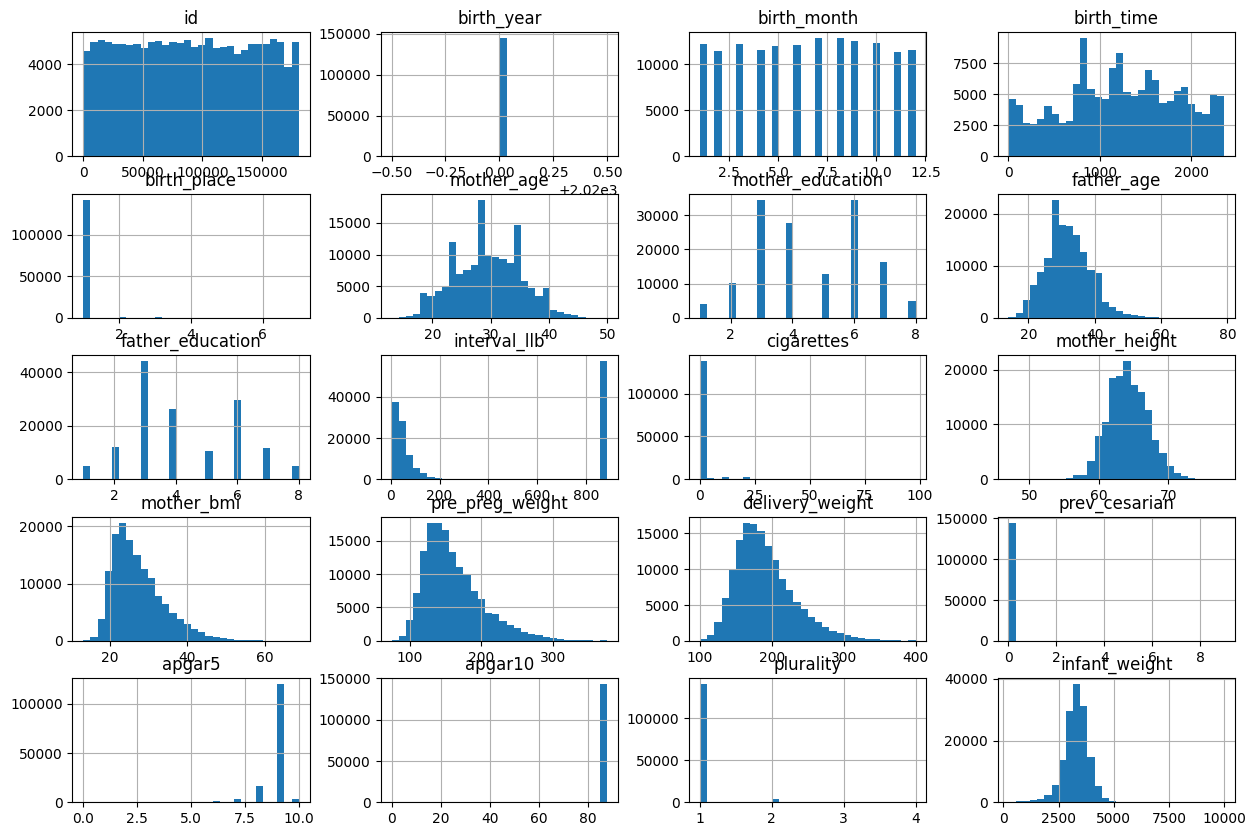

In [15]:
df.hist(bins=30, figsize=(15, 10))

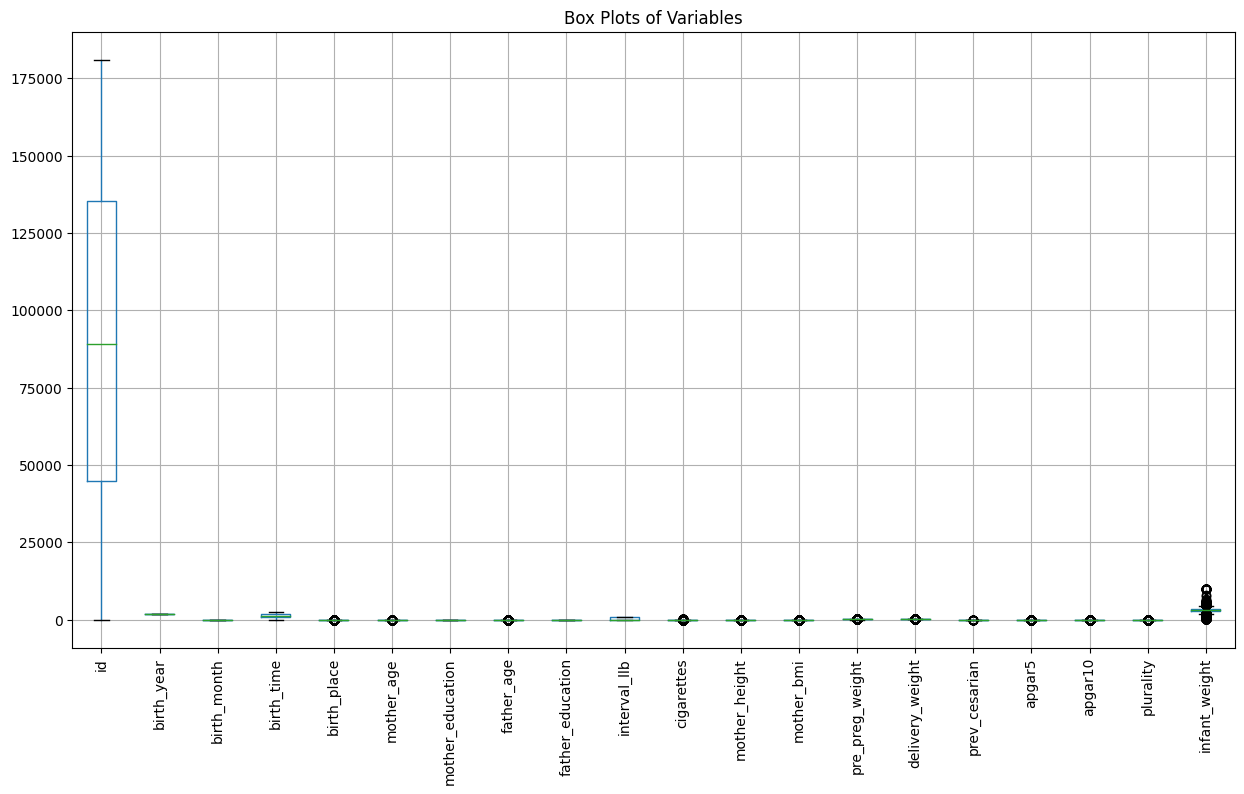

In [16]:
#  Display box plots of all variables in the DataFrame
df.boxplot(figsize=(15, 8))

# Set the title of the plot
plt.title("Box Plots of Variables")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [17]:
df.nunique() 

id                       144761
birth_year                    1
birth_month                  12
birth_time                 1440
birth_place                   7
mother_age                   38
marital_status                5
mother_education              8
father_age                   64
father_education              8
interval_llb                288
cigarettes                   35
mother_height                32
mother_bmi                  512
pre_preg_weight             300
delivery_weight             300
pre_preg_diabetes             2
gest_diabetes                 2
pre_preg_hypertension         2
gest_hypertension             2
prev_preterm_birth            2
infertility_treatment         2
prev_cesarian                 2
gonorrhea                     2
syphilis                      2
chlamydia                     2
hepatitis_b                   2
hepatitis_c                   2
labor_induction               2
labor_augmentation            2
steroids                      2
antibiot

### Change Catergoical Variables into Continuous Variables 

#### birth_month

In [18]:
# Define the mapping dictionary for months
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert the 'birth_month' column to a continuous variable
df['birth_month'] = df['birth_month'].replace(month_mapping)

df['birth_month']

0          1
3          1
4          1
5          1
6          1
          ..
180982    12
180983    12
180984    12
180985    12
180986    12
Name: birth_month, Length: 144761, dtype: int64

#### birth_place

In [19]:
# Define the mapping dictionary for birth_place
birth_place_mapping = {
    'Hospital': 1,
    'Freestanding Birth Center': 2,
    'Home (intended)': 3,
    'Home (not intended)': 4,
    'Home (unknown if intended)': 5,
    'Clinic / Doctor’s Office': 6,
    'Other': 7,
    'Unknown': 9
}

# Convert the 'birth_place' column to a continuous variable
df['birth_place'] = df['birth_place'].replace(birth_place_mapping).astype(int)

df['birth_place']

0         1
3         1
4         1
5         1
6         1
         ..
180982    1
180983    1
180984    1
180985    1
180986    1
Name: birth_place, Length: 144761, dtype: int64

#### mother_education

In [20]:
# Create a dictionary to map the education categories to numerical values
mother_education_mapping = {
    '8th grade or less': 1,
    '9th through 12th grade with no diploma': 2,
    'High school graduate or GED completed': 3,
    'Some college credit, but not a degree': 4,
    'Associate degree (AA,AS)': 5,
    'Bachelor’s degree (BA, AB, BS)': 6,
    'Master’s degree (MA, MS, MEng, MEd, MSW, MBA)': 7,
    'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)': 8,
    'Unknown': 9
}

# Replace the values in the 'mother_education' column with the numerical encoding
df['mother_education'] = df['mother_education'].replace(mother_education_mapping)

# Convert the 'mother_education' column to integer type
df['mother_education'] = df['mother_education'].astype(int)

df['mother_education']

0         3
3         4
4         4
5         6
6         6
         ..
180982    4
180983    7
180984    7
180985    1
180986    4
Name: mother_education, Length: 144761, dtype: int64

#### father_education

In [21]:
# Create a dictionary to map the education categories to numerical values
father_education_mapping = {
    '8th grade or less': 1,
    '9th through 12th grade with no diploma': 2,
    'High school graduate or GED completed': 3,
    'Some college credit, but not a degree': 4,
    'Associate degree (AA,AS)': 5,
    'Bachelor’s degree (BA, AB, BS)': 6,
    'Master’s degree (MA, MS, MEng, MEd, MSW, MBA)': 7,
    'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)': 8,
    'Unknown': 9
}

# Replace the values in the 'father_education' column with the numerical encoding
df['father_education'] = df['father_education'].replace(father_education_mapping)

# Convert the 'father_education' column to integer type
df['father_education'] = df['father_education'].astype(int)

df['father_education']

0         3
3         4
4         3
5         5
6         8
         ..
180982    4
180983    4
180984    6
180985    1
180986    6
Name: father_education, Length: 144761, dtype: int64

In [22]:
df

,id,birth_year,birth_month,birth_time,birth_place,mother_age,marital_status,mother_education,father_age,father_education,...,labor_augmentation,steroids,antibiotics,chorioamnionitis,anesthesia,apgar5,apgar10,plurality,gender,infant_weight
0,1,2020,1,1123.0,1,25,1,3,30.0,3,...,N,N,Y,Y,Y,8.0,88.0,1,M,3570
3,4,2020,1,329.0,1,25,1,4,21.0,4,...,N,N,N,N,N,9.0,88.0,1,M,2744
4,5,2020,1,2333.0,1,25,1,4,28.0,3,...,N,N,N,N,Y,9.0,88.0,1,F,3425
5,6,2020,1,910.0,1,28,1,6,28.0,5,...,N,N,N,N,N,9.0,88.0,1,M,3345
6,7,2020,1,1225.0,1,33,1,6,34.0,8,...,N,N,N,N,N,8.0,88.0,1,F,4540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180982,180983,2020,12,1507.0,1,25,2,4,25.0,4,...,N,N,N,N,Y,9.0,88.0,1,M,4010
180983,180984,2020,12,1451.0,1,38,1,7,36.0,4,...,N,N,N,N,Y,9.0,88.0,1,M,3010
180984,180985,2020,12,655.0,1,26,1,7,30.0,6,...,N,N,N,N,Y,9.0,88.0,1,M,3760
180985,180986,2020,12,1313.0,1,23,1,1,32.0,1,...,N,N,N,N,Y,9.0,88.0,1,F,2680


#### One Hot Encoding with Dummy Variables (continous variables)

In [23]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df['Dummy_marital_status'] = [1 if v == '1' else 0 for v in df['marital_status']]
df['Dummy_pre_preg_diabetes'] = [1 if v == 'Y' else 0 for v in df['pre_preg_diabetes']]
df['Dummy_gest_diabetes'] = [1 if v == 'Y' else 0 for v in df['gest_diabetes']]
df['Dummy_pre_preg_hypertension'] = [1 if v == 'Y' else 0 for v in df['pre_preg_hypertension']]
df['Dummy_gest_hypertension'] = [1 if v == 'Y' else 0 for v in df['gest_hypertension']]
df['Dummy_prev_preterm_birth'] = [1 if v == 'Y' else 0 for v in df['prev_preterm_birth']]
df['Dummy_infertility_treatment'] = [1 if v == 'Y' else 0 for v in df['infertility_treatment']]
df['Dummy_gonorrhea'] = [1 if v == 'Y' else 0 for v in df['gonorrhea']]
df['Dummy_syphilis'] = [1 if v == 'Y' else 0 for v in df['syphilis']]
df['Dummy_chlamydia'] = [1 if v == 'Y' else 0 for v in df['chlamydia']]
df['Dummy_hepatitis_b'] = [1 if v == 'Y' else 0 for v in df['hepatitis_b']]
df['Dummy_hepatitis_c'] = [1 if v == 'Y' else 0 for v in df['hepatitis_c']]
df['Dummy_labor_induction'] = [1 if v == 'Y' else 0 for v in df['labor_induction']]
df['Dummy_labor_augmentation'] = [1 if v == 'Y' else 0 for v in df['labor_augmentation']]
df['Dummy_steroids'] = [1 if v == 'Y' else 0 for v in df['steroids']]
df['Dummy_antibiotics'] = [1 if v == 'Y' else 0 for v in df['antibiotics']]
df['Dummy_chorioamnionitis'] = [1 if v == 'Y' else 0 for v in df['chorioamnionitis']]
df['Dummy_anesthesia'] = [1 if v == 'Y' else 0 for v in df['anesthesia']]
df['Dummy_gender'] = [1 if v == 'M' else 0 for v in df['gender']]
df['Dummy_steroids'] = [1 if v == 'Y' else 0 for v in df['steroids']]

In [24]:
df

,id,birth_year,birth_month,birth_time,birth_place,mother_age,marital_status,mother_education,father_age,father_education,...,Dummy_chlamydia,Dummy_hepatitis_b,Dummy_hepatitis_c,Dummy_labor_induction,Dummy_labor_augmentation,Dummy_steroids,Dummy_antibiotics,Dummy_chorioamnionitis,Dummy_anesthesia,Dummy_gender
0,1,2020,1,1123.0,1,25,1,3,30.0,3,...,0,0,0,1,0,0,1,1,1,1
3,4,2020,1,329.0,1,25,1,4,21.0,4,...,0,0,0,1,0,0,0,0,0,1
4,5,2020,1,2333.0,1,25,1,4,28.0,3,...,0,0,0,0,0,0,0,0,1,0
5,6,2020,1,910.0,1,28,1,6,28.0,5,...,0,0,0,0,0,0,0,0,0,1
6,7,2020,1,1225.0,1,33,1,6,34.0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180982,180983,2020,12,1507.0,1,25,2,4,25.0,4,...,0,0,0,1,0,0,0,0,1,1
180983,180984,2020,12,1451.0,1,38,1,7,36.0,4,...,0,0,0,0,0,0,0,0,1,1
180984,180985,2020,12,655.0,1,26,1,7,30.0,6,...,0,0,0,0,0,0,0,0,1,1
180985,180986,2020,12,1313.0,1,23,1,1,32.0,1,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# Display the columns of the DataFrame
print(df.columns)

Index(['id', 'birth_year', 'birth_month', 'birth_time', 'birth_place',
       'mother_age', 'marital_status', 'mother_education', 'father_age',
       'father_education', 'interval_llb', 'cigarettes', 'mother_height',
       'mother_bmi', 'pre_preg_weight', 'delivery_weight', 'pre_preg_diabetes',
       'gest_diabetes', 'pre_preg_hypertension', 'gest_hypertension',
       'prev_preterm_birth', 'infertility_treatment', 'prev_cesarian',
       'gonorrhea', 'syphilis', 'chlamydia', 'hepatitis_b', 'hepatitis_c',
       'labor_induction', 'labor_augmentation', 'steroids', 'antibiotics',
       'chorioamnionitis', 'anesthesia', 'apgar5', 'apgar10', 'plurality',
       'gender', 'infant_weight', 'Dummy_marital_status',
       'Dummy_pre_preg_diabetes', 'Dummy_gest_diabetes',
       'Dummy_pre_preg_hypertension', 'Dummy_gest_hypertension',
       'Dummy_prev_preterm_birth', 'Dummy_infertility_treatment',
       'Dummy_gonorrhea', 'Dummy_syphilis', 'Dummy_chlamydia',
       'Dummy_hepatitis_b',

In [26]:
# Drop original categorical features from dataframe and unnecessary columns 
df = df.drop(columns=['id','prev_cesarian', 'marital_status', 'pre_preg_diabetes', 'gest_diabetes','pre_preg_hypertension','gest_hypertension',
                      'infertility_treatment','prev_preterm_birth', 'gonorrhea', 'syphilis', 'chlamydia', 'hepatitis_b',
                     'hepatitis_c','labor_induction', 'labor_augmentation','antibiotics', 'chorioamnionitis', 'steroids',
                     'anesthesia', 'gender'])


In [27]:
print(df.columns)

Index(['birth_year', 'birth_month', 'birth_time', 'birth_place', 'mother_age',
       'mother_education', 'father_age', 'father_education', 'interval_llb',
       'cigarettes', 'mother_height', 'mother_bmi', 'pre_preg_weight',
       'delivery_weight', 'apgar5', 'apgar10', 'plurality', 'infant_weight',
       'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
       'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
       'Dummy_gest_hypertension', 'Dummy_prev_preterm_birth',
       'Dummy_infertility_treatment', 'Dummy_gonorrhea', 'Dummy_syphilis',
       'Dummy_chlamydia', 'Dummy_hepatitis_b', 'Dummy_hepatitis_c',
       'Dummy_labor_induction', 'Dummy_labor_augmentation', 'Dummy_steroids',
       'Dummy_antibiotics', 'Dummy_chorioamnionitis', 'Dummy_anesthesia',
       'Dummy_gender'],
      dtype='object')


### Univariate Analysis

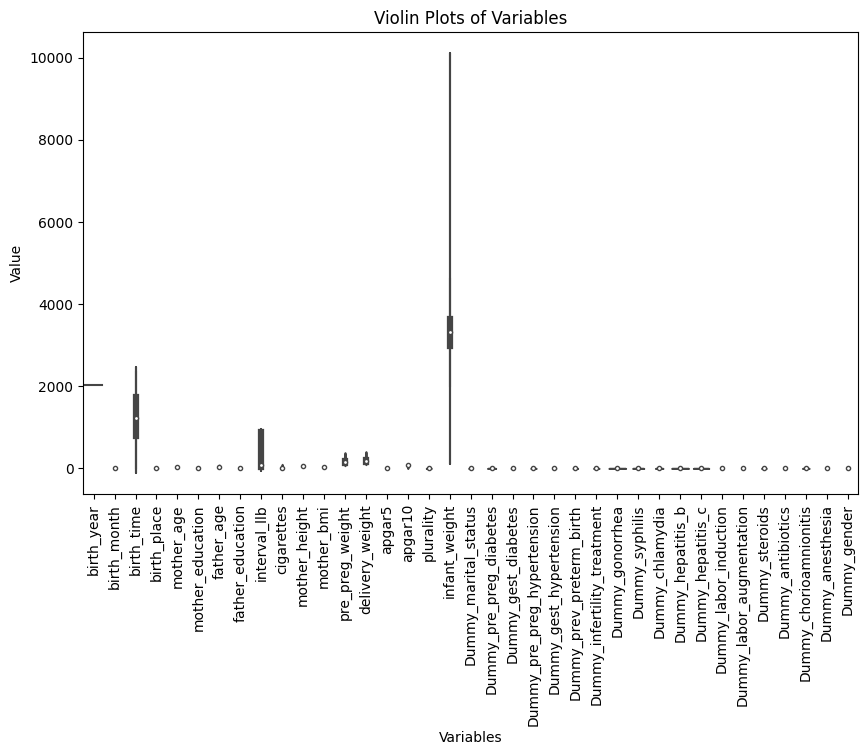

In [28]:

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create violin plots for each variable
sns.violinplot(data=df)

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Value')
plt.title('Violin Plots of Variables')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()



#### Continuous Variables

<AxesSubplot: xlabel='birth_time'>

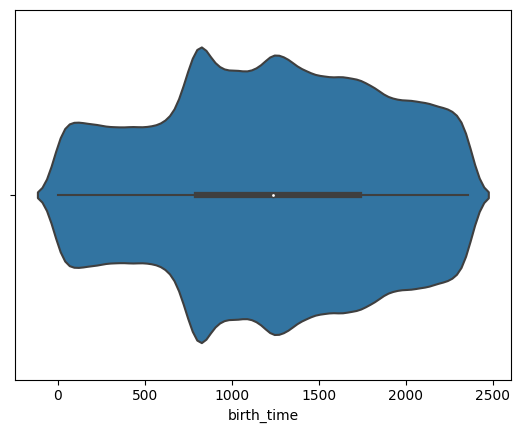

In [29]:
sns.violinplot(x=df['birth_time'])

<AxesSubplot: xlabel='mother_age'>

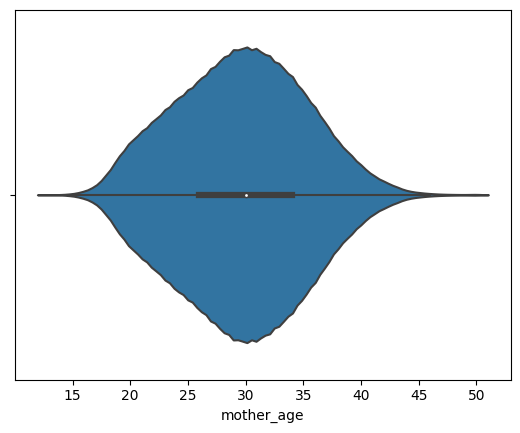

In [30]:
sns.violinplot(x=df['mother_age'])

<AxesSubplot: xlabel='father_age'>

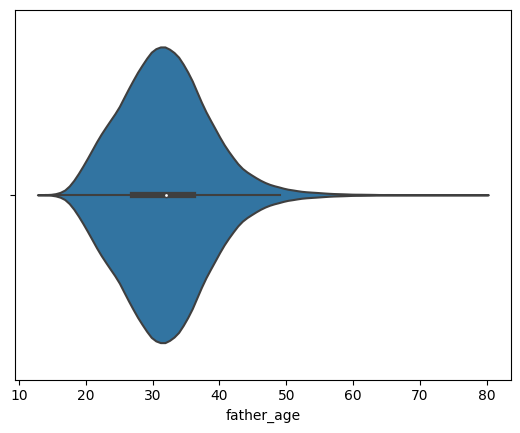

In [31]:
sns.violinplot(x=df['father_age'])

<AxesSubplot: xlabel='mother_height'>

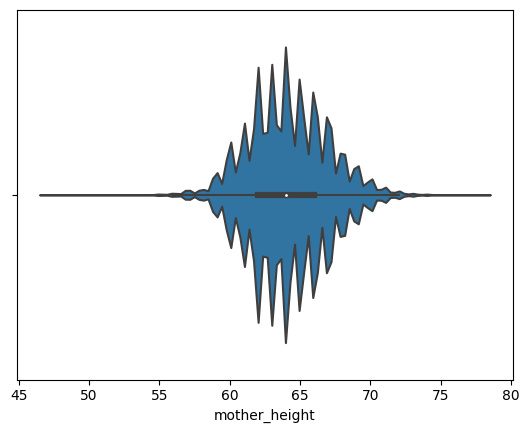

In [32]:
sns.violinplot(x=df['mother_height'])

<AxesSubplot: xlabel='mother_bmi'>

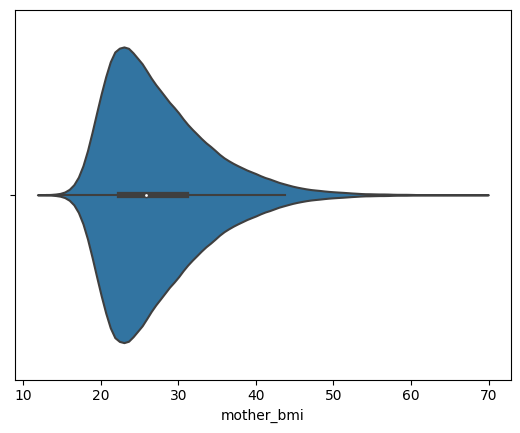

In [33]:
sns.violinplot(x=df['mother_bmi'])

<AxesSubplot: xlabel='pre_preg_weight'>

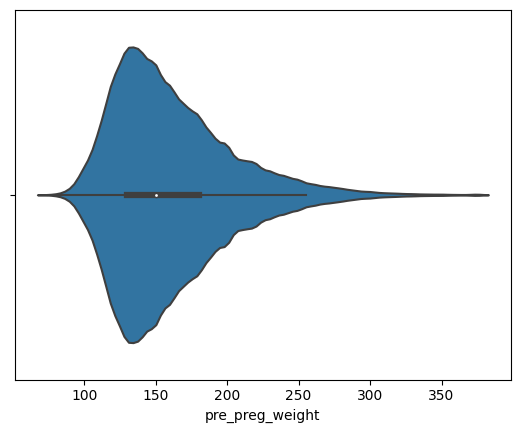

In [34]:
sns.violinplot(x=df['pre_preg_weight'])

<AxesSubplot: xlabel='delivery_weight'>

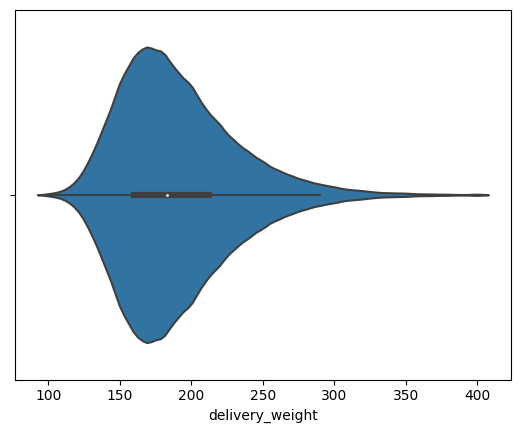

In [35]:
sns.violinplot(x=df['delivery_weight'])

<AxesSubplot: xlabel='apgar5'>

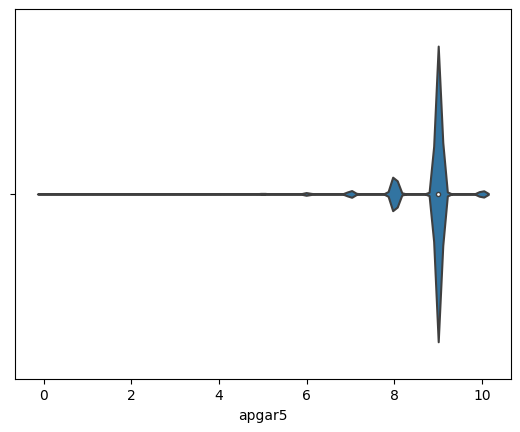

In [36]:
sns.violinplot(x=df['apgar5'])

<AxesSubplot: xlabel='apgar10'>

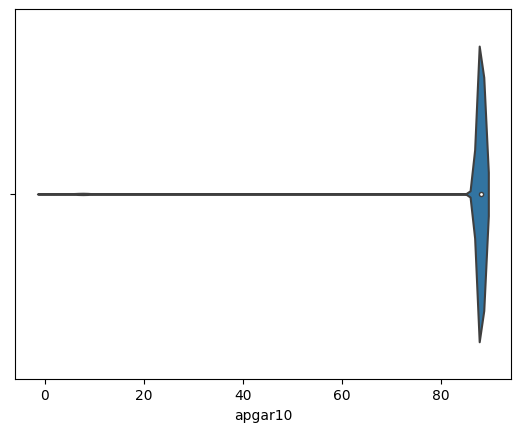

In [37]:
sns.violinplot(x=df['apgar10'])

<AxesSubplot: xlabel='plurality'>

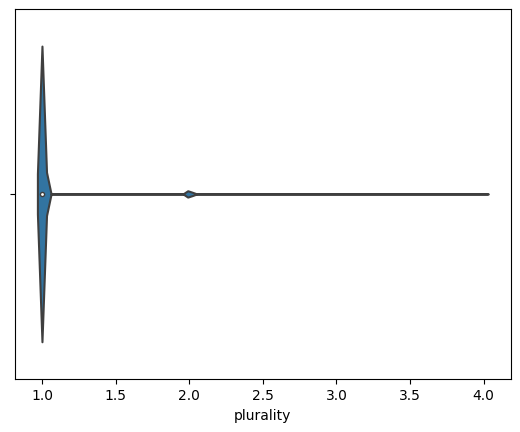

In [38]:
sns.violinplot(x=df['plurality'])

<AxesSubplot: xlabel='infant_weight'>

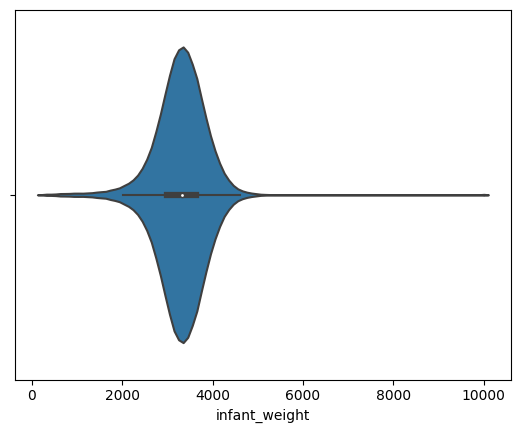

In [39]:
sns.violinplot(x=df['infant_weight'])

<AxesSubplot: xlabel='mother_education'>

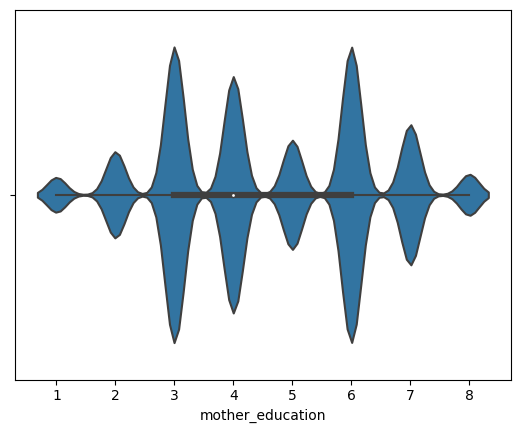

In [40]:
sns.violinplot(x=df['mother_education'])

<AxesSubplot: xlabel='father_education'>

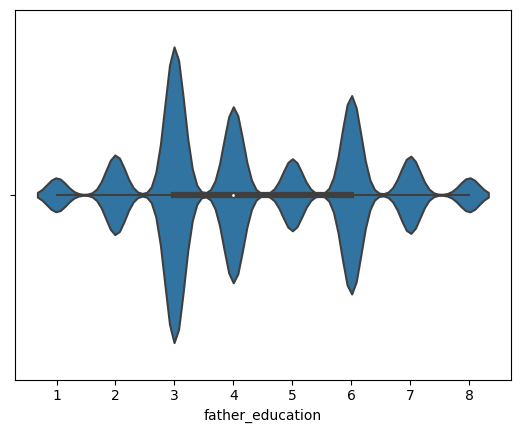

In [41]:
sns.violinplot(x=df['father_education'])

#### Categorical Variables

##### Count Plot

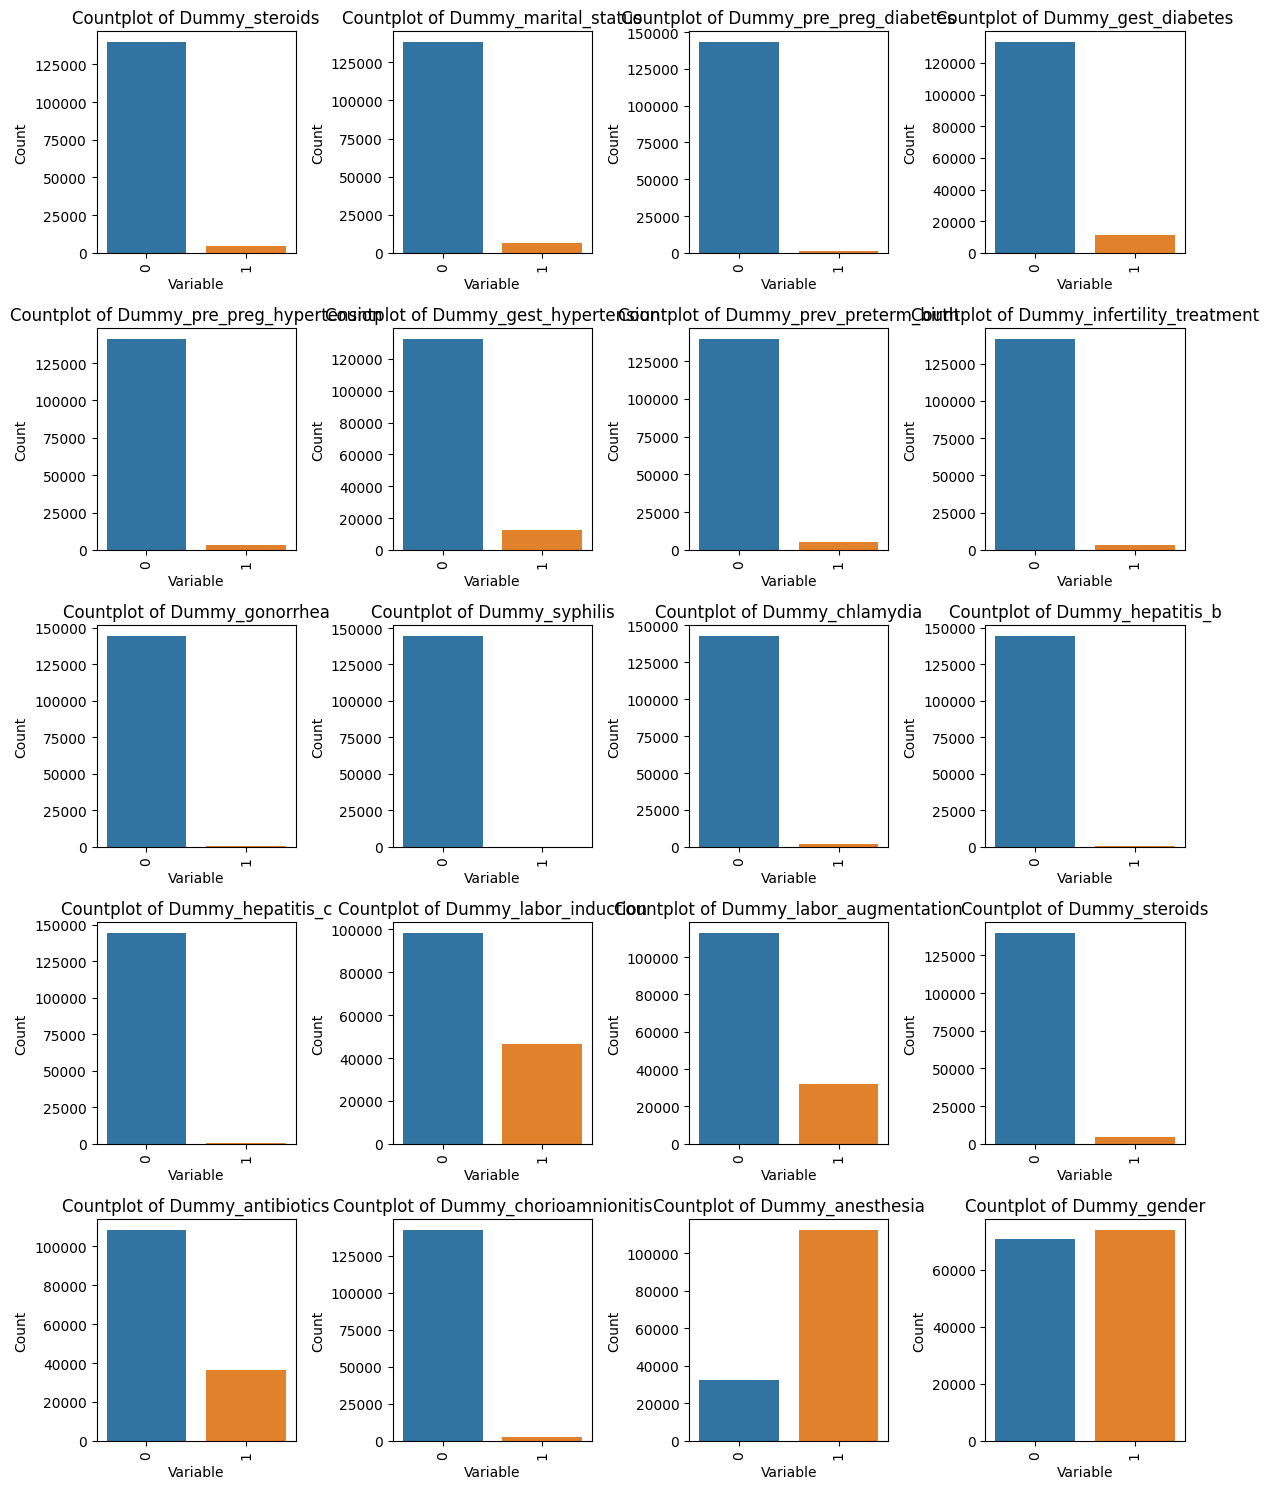

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Dummy_steroids','Dummy_marital_status', 'Dummy_pre_preg_diabetes', 
             'Dummy_gest_diabetes','Dummy_pre_preg_hypertension', 'Dummy_gest_hypertension', 
             'Dummy_prev_preterm_birth',
             'Dummy_infertility_treatment', 'Dummy_gonorrhea', 'Dummy_syphilis',
             'Dummy_chlamydia', 'Dummy_hepatitis_b', 'Dummy_hepatitis_c',
             'Dummy_labor_induction', 'Dummy_labor_augmentation', 'Dummy_steroids',
             'Dummy_antibiotics', 'Dummy_chorioamnionitis', 'Dummy_anesthesia',
             'Dummy_gender']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each variable and create a countplot
for i, variable in enumerate(variables):
    sns.countplot(data=df, x=variable, ax=axes[i])
    axes[i].set_xlabel('Variable')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Countplot of {variable}')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


##### Pie Chart

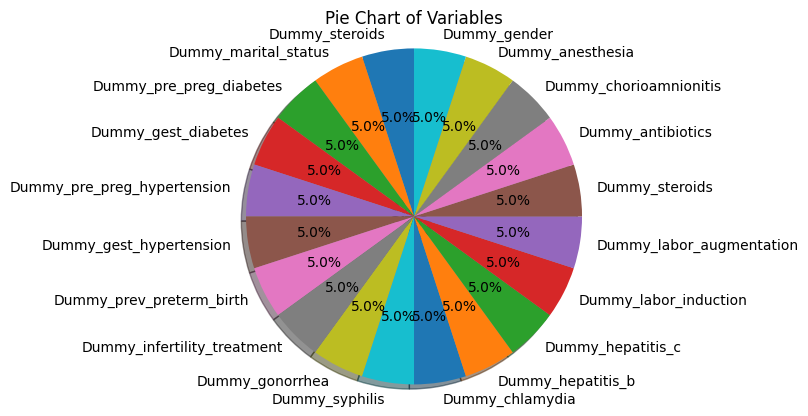

In [43]:
frequencies = [df[variable].value_counts().sum() for variable in variables]
plt.pie(frequencies, labels=variables, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Variables')
plt.show()

### Bivariante Analysis

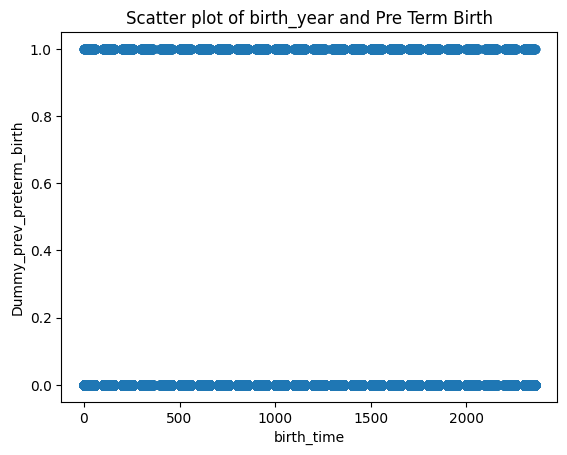

In [44]:
plt.scatter(df['birth_time'], df['Dummy_prev_preterm_birth'])
plt.xlabel('birth_time')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of birth_year and Pre Term Birth')
plt.show()

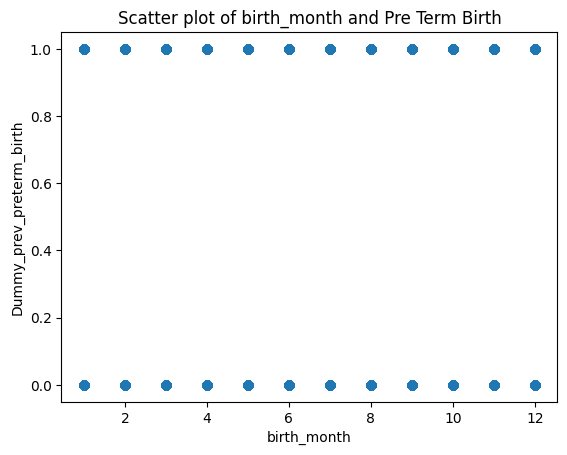

In [45]:
plt.scatter(df['birth_month'], df['Dummy_prev_preterm_birth'])
plt.xlabel('birth_month')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of birth_month and Pre Term Birth')
plt.show()

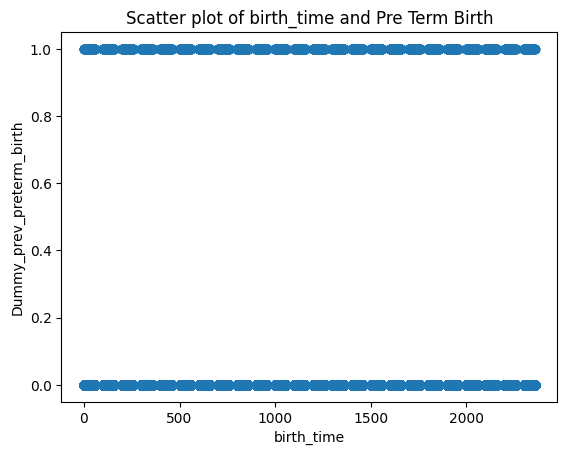

In [46]:
plt.scatter(df['birth_time'], df['Dummy_prev_preterm_birth'])
plt.xlabel('birth_time')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of birth_time and Pre Term Birth')
plt.show()

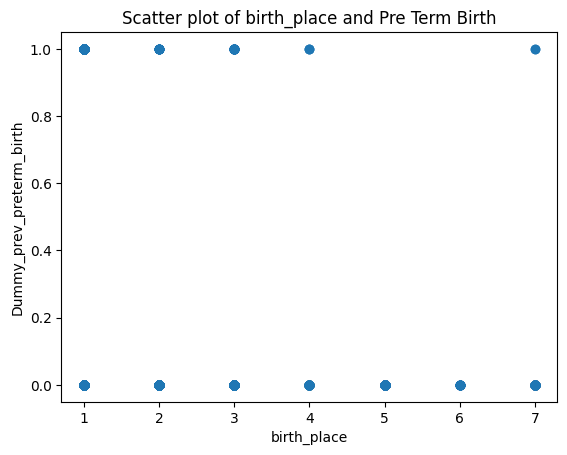

In [47]:
plt.scatter(df['birth_place'], df['Dummy_prev_preterm_birth'])
plt.xlabel('birth_place')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of birth_place and Pre Term Birth')
plt.show()

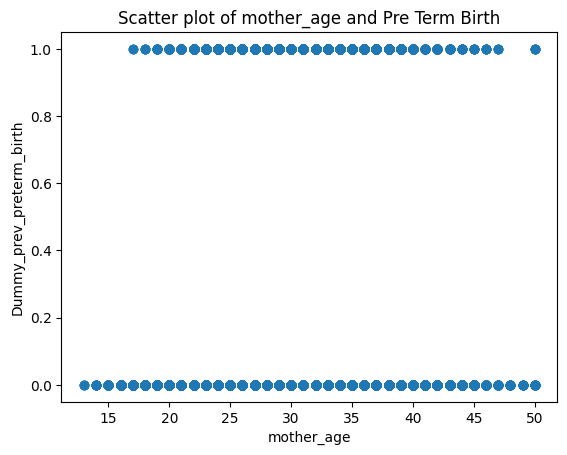

In [48]:
plt.scatter(df['mother_age'], df['Dummy_prev_preterm_birth'])
plt.xlabel('mother_age')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of mother_age and Pre Term Birth')
plt.show()

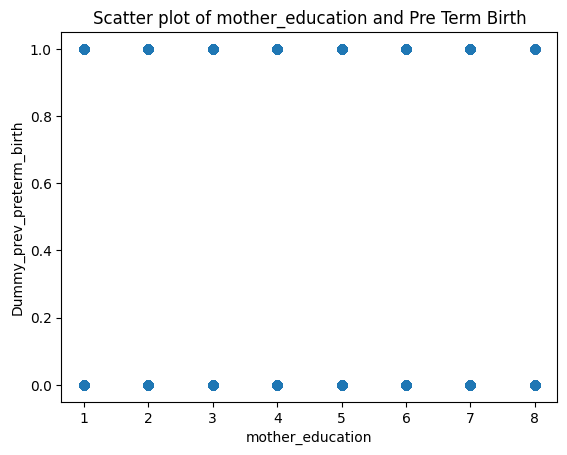

In [49]:
plt.scatter(df['mother_education'], df['Dummy_prev_preterm_birth'])
plt.xlabel('mother_education')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of mother_education and Pre Term Birth')
plt.show()

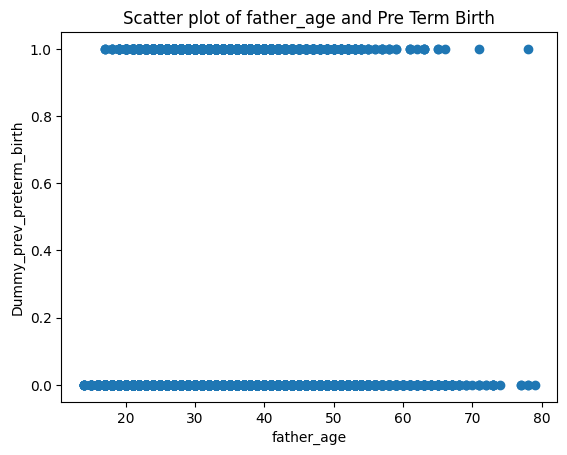

In [50]:
plt.scatter(df['father_age'], df['Dummy_prev_preterm_birth'])
plt.xlabel('father_age')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of father_age and Pre Term Birth')
plt.show()

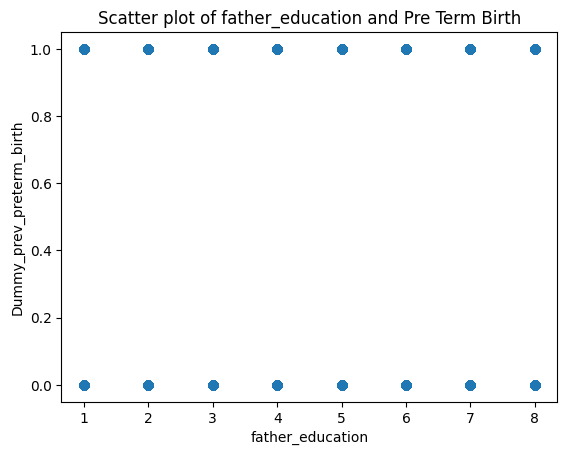

In [51]:
plt.scatter(df['father_education'], df['Dummy_prev_preterm_birth'])
plt.xlabel('father_education')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of father_education and Pre Term Birth')
plt.show()

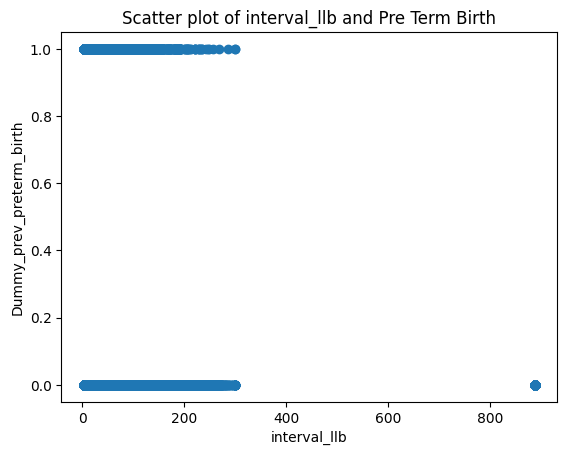

In [52]:
plt.scatter(df['interval_llb'], df['Dummy_prev_preterm_birth'])
plt.xlabel('interval_llb')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of interval_llb and Pre Term Birth')
plt.show()

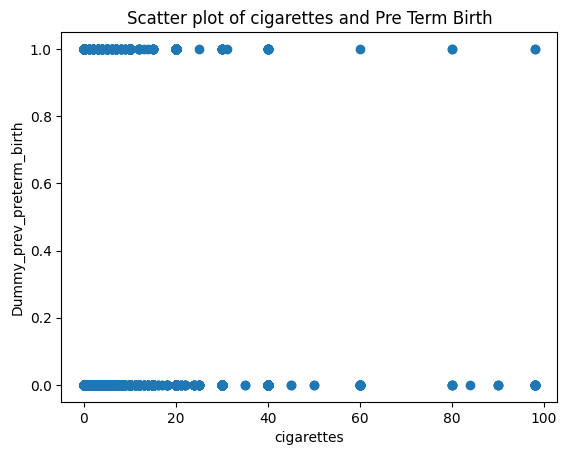

In [53]:
plt.scatter(df['cigarettes'], df['Dummy_prev_preterm_birth'])
plt.xlabel('cigarettes')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of cigarettes and Pre Term Birth')
plt.show()

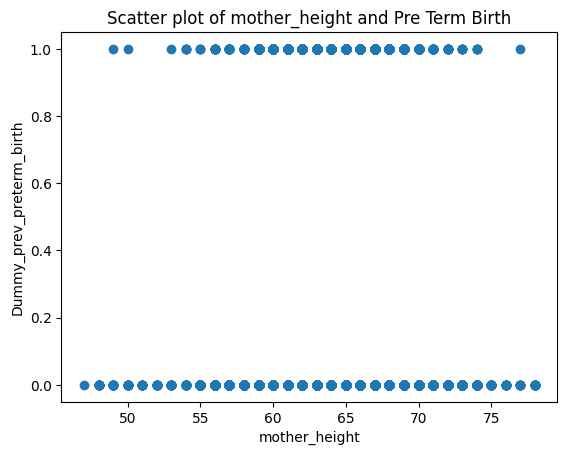

In [54]:
plt.scatter(df['mother_height'], df['Dummy_prev_preterm_birth'])
plt.xlabel('mother_height')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of mother_height and Pre Term Birth')
plt.show()

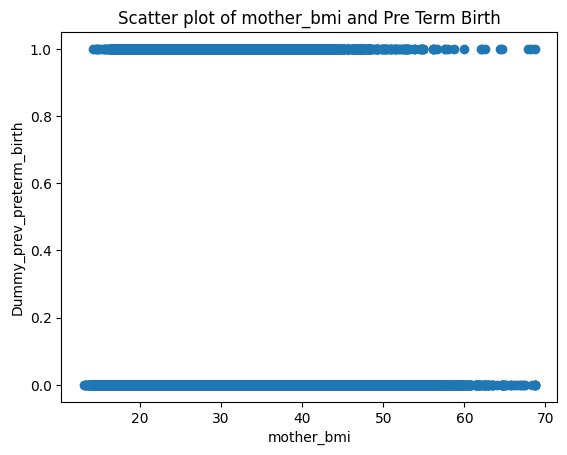

In [55]:
plt.scatter(df['mother_bmi'], df['Dummy_prev_preterm_birth'])
plt.xlabel('mother_bmi')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of mother_bmi and Pre Term Birth')
plt.show()

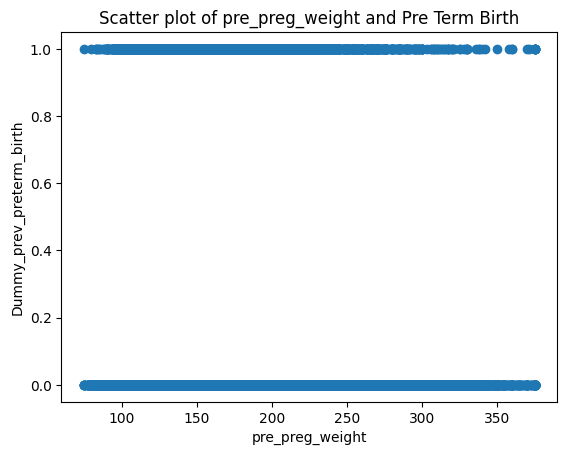

In [56]:
plt.scatter(df['pre_preg_weight'], df['Dummy_prev_preterm_birth'])
plt.xlabel('pre_preg_weight')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of pre_preg_weight and Pre Term Birth')
plt.show()

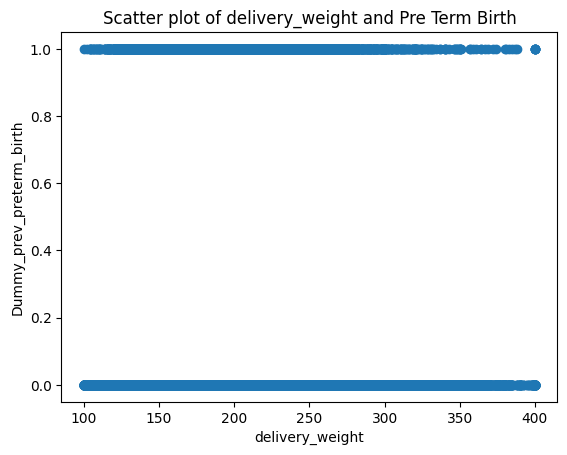

In [57]:
plt.scatter(df['delivery_weight'], df['Dummy_prev_preterm_birth'])
plt.xlabel('delivery_weight')
plt.ylabel('Dummy_prev_preterm_birth')
plt.title('Scatter plot of delivery_weight and Pre Term Birth')
plt.show()

#### Heatmap

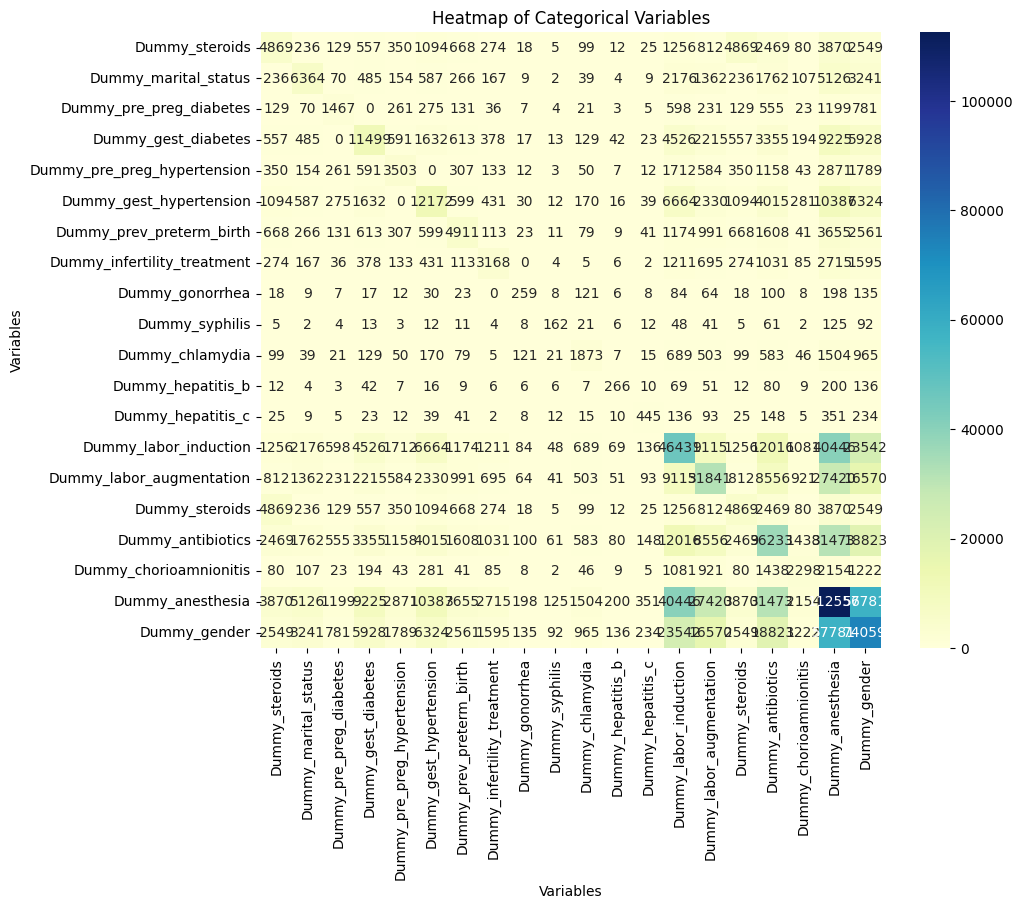

In [58]:

# Extract the categorical variables from the DataFrame
data = df[variables]

# Calculate the frequency or proportion of each combination of categories
heatmap_data = data.T.dot(data)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size as needed
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu')

# Set the labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Heatmap of Categorical Variables')

# Show the plot
plt.show()


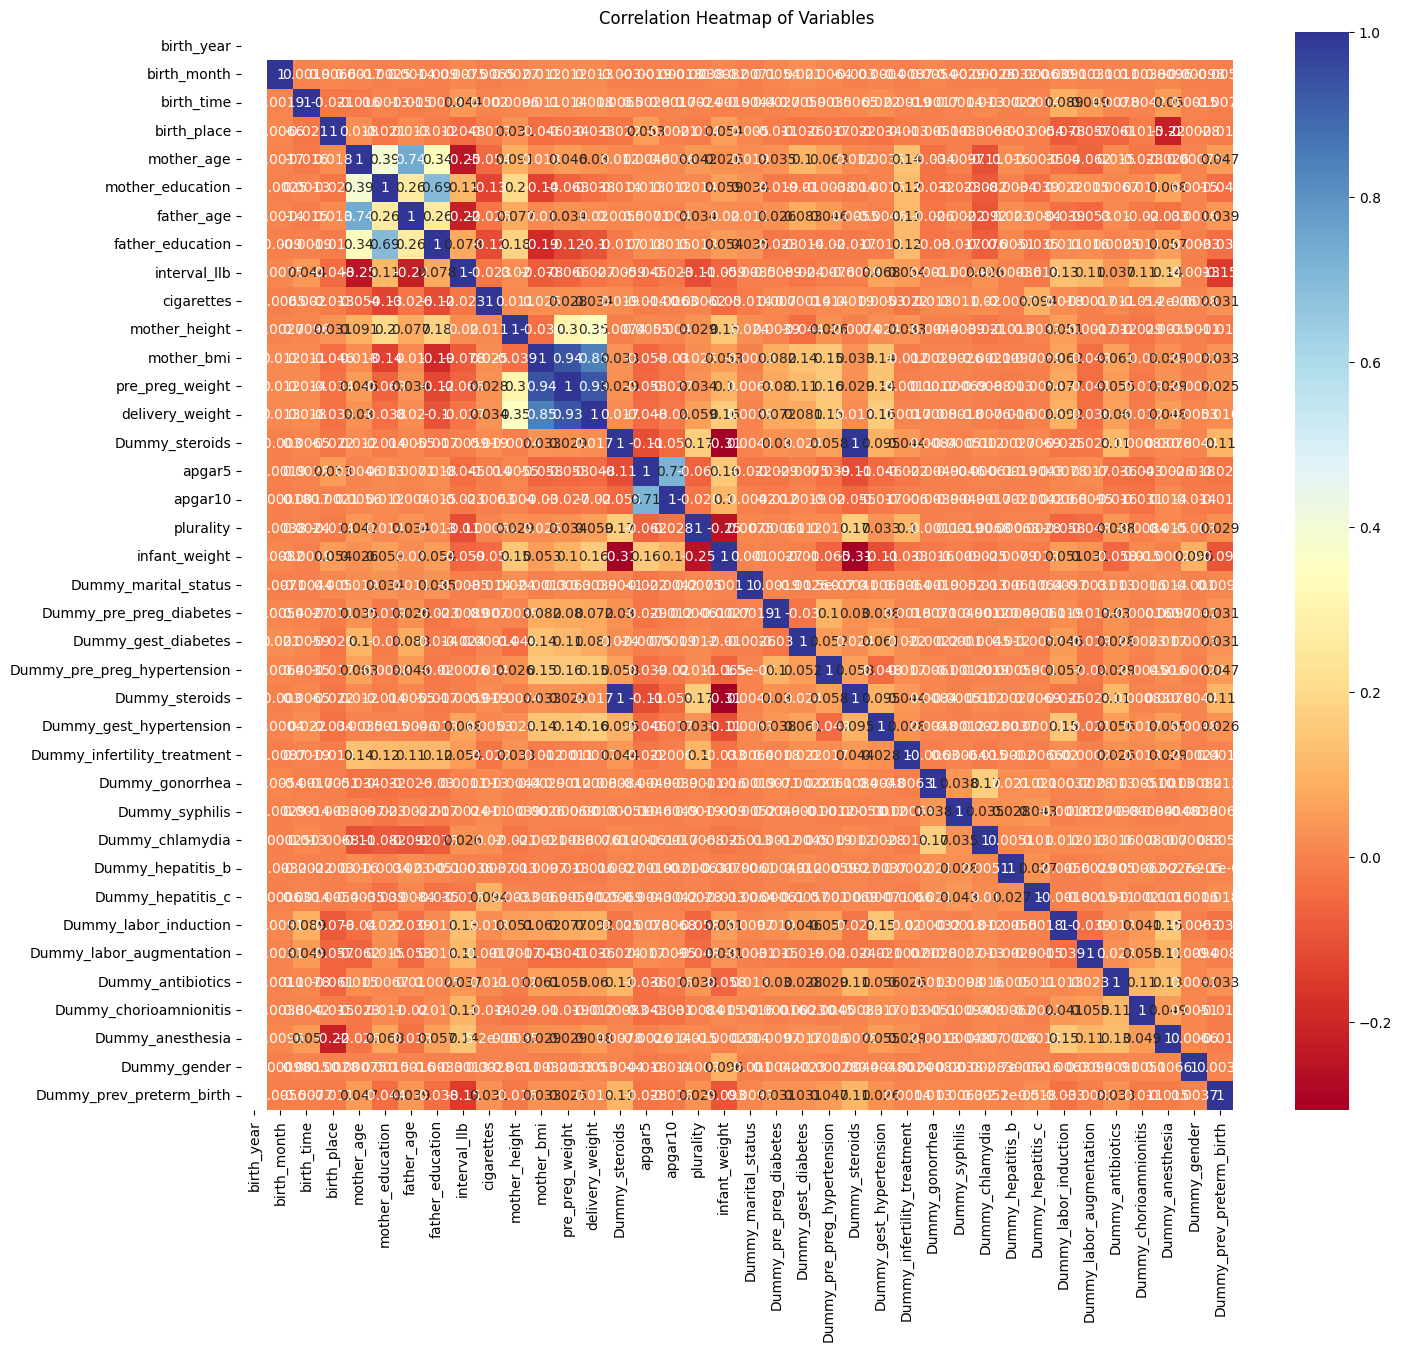

In [59]:

# Select the variables for the heatmap
variables2 = ['birth_year', 'birth_month', 'birth_time', 'birth_place', 'mother_age',
             'mother_education', 'father_age', 'father_education', 'interval_llb',
             'cigarettes', 'mother_height', 'mother_bmi', 'pre_preg_weight',
             'delivery_weight', 'Dummy_steroids', 'apgar5', 'apgar10', 'plurality',
             'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
             'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension', 'Dummy_steroids',
             'Dummy_gest_hypertension', 'Dummy_infertility_treatment', 'Dummy_gonorrhea',
             'Dummy_syphilis', 'Dummy_chlamydia', 'Dummy_hepatitis_b', 'Dummy_hepatitis_c',
             'Dummy_labor_induction', 'Dummy_labor_augmentation', 'Dummy_antibiotics',
             'Dummy_chorioamnionitis', 'Dummy_anesthesia', 'Dummy_gender', 'Dummy_prev_preterm_birth']

# Create a new dataframe with selected variables
df_selected = df[variables2].copy()

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_selected)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')

# Set the title of the heatmap
plt.title('Correlation Heatmap of Variables')

# Show the plot
plt.show()


#### Save Prepared Data to New File 

In [60]:
# Prepared dataset saved to new file 
df.to_csv('prepared_Natality_2020.csv', index=False)

### Kolmogorov-Smirnov Test

In [61]:
from scipy.stats import kstest, norm

np.random.seed(123)
sample = np.random.normal(loc=0, scale=1, size=100)
ks_stat, p_value = kstest(sample, norm.cdf)
print("Kolmogorov-Smirnov test:")
print("KS statistic:", ks_stat)
print("p-value:", p_value)


Kolmogorov-Smirnov test:
KS statistic: 0.10665330380822602
p-value: 0.19116286378085373


### Shapiro-Wilk Test

In [62]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df['Dummy_prev_preterm_birth'])

# Print the results
print("Shapiro-Wilk test statistic:", statistic)
print("P-value:", p_value)


Shapiro-Wilk test statistic: 0.17307919263839722
P-value: 0.0


### Mulitple Regression Analysis

#### Inital Model

In [63]:
X = df[['birth_year', 'birth_month', 'birth_time', 'birth_place', 'mother_age',
        'mother_education', 'father_age', 'father_education', 'interval_llb',
        'cigarettes', 'mother_height', 'mother_bmi', 'pre_preg_weight',
        'delivery_weight', 'apgar5', 'apgar10', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension', 'Dummy_steroids',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_syphilis', 'Dummy_chlamydia',
        'Dummy_hepatitis_b', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics',
        'Dummy_chorioamnionitis', 'Dummy_anesthesia', 'Dummy_gender']]

y = df['Dummy_prev_preterm_birth']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               OLS Regression Results                               
Dep. Variable:     Dummy_prev_preterm_birth   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     197.8
Date:                      Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                              18:03:01   Log-Likelihood:                 45381.
No. Observations:                    144761   AIC:                        -9.069e+04
Df Residuals:                        144725   BIC:                        -9.033e+04
Df Model:                                35                           

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Reduced Model with removal of VIF >5

In [65]:
X = df[['birth_month', 'birth_time', 'birth_place', 'mother_age',
        'mother_education', 'father_age', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'apgar5', 'apgar10', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension', 'Dummy_steroids',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_syphilis', 'Dummy_chlamydia',
        'Dummy_hepatitis_b', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics',
        'Dummy_chorioamnionitis', 'Dummy_anesthesia', 'Dummy_gender']]

y = df['Dummy_prev_preterm_birth']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               OLS Regression Results                               
Dep. Variable:     Dummy_prev_preterm_birth   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     222.3
Date:                      Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                              18:03:05   Log-Likelihood:                 45365.
No. Observations:                    144761   AIC:                        -9.067e+04
Df Residuals:                        144729   BIC:                        -9.035e+04
Df Model:                                31                           

#### Reduced model with remvoal of p>0.05

In [66]:
X = df[['birth_place', 'mother_age',
        'mother_education', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'plurality',
      'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension', 'Dummy_steroids',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea',
   'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics']]

y = df['Dummy_prev_preterm_birth']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               OLS Regression Results                               
Dep. Variable:     Dummy_prev_preterm_birth   R-squared:                       0.040
Model:                                  OLS   Adj. R-squared:                  0.040
Method:                       Least Squares   F-statistic:                     321.2
Date:                      Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                              18:03:06   Log-Likelihood:                 44987.
No. Observations:                    144761   AIC:                        -8.993e+04
Df Residuals:                        144741   BIC:                        -8.974e+04
Df Model:                                19                           

#### Final Reduced Model

In [67]:
X = df[[  'birth_place', 'mother_age','mother_education', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'plurality','infant_weight', 'Dummy_marital_status', 
        'Dummy_pre_preg_diabetes','Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment', 'Dummy_steroids',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_augmentation', 'Dummy_antibiotics',  'Dummy_gender'
      ]]

y = df['Dummy_prev_preterm_birth']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               OLS Regression Results                               
Dep. Variable:     Dummy_prev_preterm_birth   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     341.5
Date:                      Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                              18:03:06   Log-Likelihood:                 45335.
No. Observations:                    144761   AIC:                        -9.063e+04
Df Residuals:                        144740   BIC:                        -9.042e+04
Df Model:                                20                           

#### Mean Squared Error/Residual Squared Error

In [68]:
from sklearn.metrics import mean_squared_error

X = df[['birth_place', 'mother_age','mother_education', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'plurality','infant_weight', 'Dummy_marital_status', 
        'Dummy_pre_preg_diabetes','Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment', 'Dummy_steroids',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_augmentation', 'Dummy_antibiotics','Dummy_gender']]

y = df['Dummy_prev_preterm_birth']

# Fit reduced model
model = sm.OLS(y, sm.add_constant(X[['birth_place', 'mother_age','mother_education', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'plurality','infant_weight', 'Dummy_marital_status', 
        'Dummy_pre_preg_diabetes','Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment', 'Dummy_steroids',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_augmentation', 
        'Dummy_antibiotics',  'Dummy_gender']])).fit()

# Get predicted values and actual values
y_pred = model.predict(sm.add_constant(X[['birth_place', 'mother_age','mother_education', 'father_education', 'interval_llb',
        'cigarettes', 'Dummy_steroids', 'plurality','infant_weight', 'Dummy_marital_status', 
        'Dummy_pre_preg_diabetes','Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment', 'Dummy_steroids',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_augmentation', 'Dummy_antibiotics',  'Dummy_gender']]))
y_true = y

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)


print("Mean Squared Error: ", mse)


# Calculate RSE
rse = np.sqrt(mse)
print("Residual Squared Error: ", rse)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Mean Squared Error:  0.03129728162464581
Residual Squared Error:  0.1769103773797507


#### Standardized Coefficients

In [69]:
# Fit the OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the coefficient estimates and standard errors
coef = model.params.values[1:]
std_err = model.bse[1:]

# Calculate the standard deviation of each predictor variable
std_dev = np.std(X.iloc[:, 1:], axis=0)

# Standardize the coefficients
coef_std = coef / std_dev

# Print the standardized coefficients
print(coef_std)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
birth_place                   -1.861906e-02
mother_age                     1.029380e-04
mother_education              -1.176788e-03
father_education              -5.684292e-04
interval_llb                  -1.645462e-07
cigarettes                     2.020219e-04
Dummy_steroids                 2.153224e-01
plurality                     -1.459100e-01
infant_weight                 -4.197016e-08
Dummy_marital_status           3.714188e-02
Dummy_pre_preg_diabetes        3.916578e-01
Dummy_gest_diabetes            5.035981e-02
Dummy_pre_preg_hypertension    2.422968e-01
Dummy_gest_hypertension        4.382765e-02
Dummy_infertility_treatment    4.573416e-02
Dummy_steroids                 2.153224e-01
Dummy_gonorrhea                9.692908e-01
Du

#### Coefficients & Intercept

In [70]:
from sklearn.linear_model import LinearRegression

# create some sample data
X = np.random.rand(100, 5)
y = np.random.rand(100)

# fit the linear regression model
reg = LinearRegression().fit(X, y)

# get the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 0.14648006  0.21760186  0.19794293 -0.09386233  0.07351614]
Intercept: 0.27460671409548165


#### Residual Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


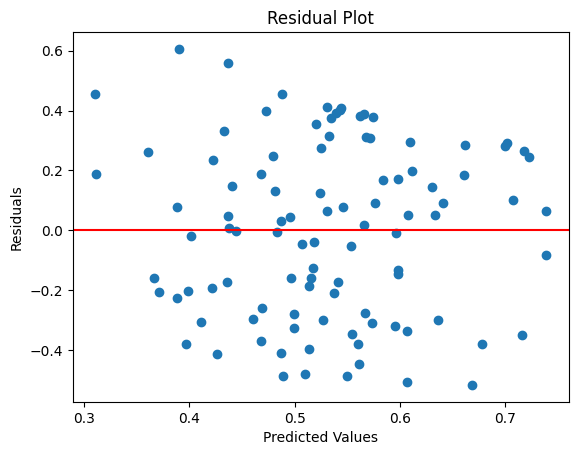

In [71]:
# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Generate the predicted values
y_pred = model.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### Cross-Validation scores

In [72]:
scores = cross_val_score(reg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [-0.01900525 -0.25505279  0.2439426   0.05838873  0.09044186]
Mean score: 0.02374303148832575


#### Cook's Distance

In [73]:
# create some sample data
X = np.random.rand(100, 5)
y = np.random.rand(100)

# fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# get the Cook's distance
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

print('Cook\'s distance:', cook_distance)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Cook's distance: [2.97695452e-02 3.99320708e-03 7.93508528e-03 2.84644945e-02
 8.60072725e-03 2.96866120e-03 4.78134184e-02 3.42630148e-04
 2.22439881e-05 8.84949733e-04 4.34236969e-03 2.39283637e-03
 1.50957890e-02 6.71871509e-03 1.37669132e-02 7.14973517e-03
 2.63094513e-03 2.94405695e-03 1.15083961e-02 3.51765905e-02
 1.62854931e-02 6.92108473e-02 2.71041950e-02 2.18158228e-03
 5.08997771e-03 2.99762952e-03 2.11416492e-02 3.42432964e-03
 8.84718389e-04 2.34154159e-03 1.87639113e-02 2.34851268e-02
 8.01133395e-03 4.29153415e-03 3.43950461e-06 1.72935703e-02
 2.44381168e-03 1.31155743e-02 1.03027209e-02 8.11618853e-03
 9.17412262e-03 4.66043213e-04 2.25045926e-02 1.74460951e-02
 1.57765385e-02 1.30005295e-02 4.95109754e-03 1.29085800e-03
 

#### ANOVA

In [74]:
from statsmodels.formula.api import ols
# Define the ANOVA model formula
formula = 'Dummy_prev_preterm_birth ~ birth_place + mother_age + mother_education + father_education + interval_llb + cigarettes + Dummy_steroids + plurality + infant_weight + Dummy_marital_status + Dummy_pre_preg_diabetes + Dummy_gest_diabetes + Dummy_pre_preg_hypertension + Dummy_gest_hypertension + Dummy_infertility_treatment + Dummy_gonorrhea + Dummy_hepatitis_c + Dummy_labor_induction + Dummy_labor_augmentation + Dummy_antibiotics + Dummy_gender'

# Fit the ANOVA model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                   df       sum_sq    mean_sq            F  \
birth_place                       1.0     0.588074   0.588074    18.791007   
mother_age                        1.0    10.674423  10.674423   341.084942   
mother_education                  1.0    22.250158  22.250158   710.969919   
father_education                  1.0     1.457012   1.457012    46.556615   
interval_llb                      1.0    82.822204  82.822204  2646.457406   
cigarettes                        1.0     2.579937   2.579937    82.437964   
Dummy_steroids                    1.0    51.100769  51.100769  1632.847243   
plurality                         1.0     0.112827   0.112827     3.605224   
infant_weight                     1.0    25.2719

### Logistic Regression 

In [75]:
df['intercept'] = 1
churn_logit = sm.Logit(df['Dummy_prev_preterm_birth'], df[['birth_year', 'birth_month', 'birth_time', 'birth_place', 'mother_age',
        'mother_education', 'father_age', 'father_education', 'interval_llb',
        'cigarettes', 'mother_height', 'mother_bmi', 'pre_preg_weight',
        'delivery_weight', 'Dummy_steroids', 'apgar5', 'apgar10', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_syphilis', 'Dummy_chlamydia',
        'Dummy_hepatitis_b', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics',
        'Dummy_chorioamnionitis', 'Dummy_anesthesia', 'Dummy_gender']])
results = churn_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.122108
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Dummy_prev_preterm_birth   No. Observations:               144761
Model:                                Logit   Df Residuals:                   144725
Method:                                 MLE   Df Model:                           35
Date:                      Thu, 29 Jun 2023   Pseudo R-squ.:                  0.1757
Time:                              18:03:07   Log-Likelihood:                -17676.
converged:                             True   LL-Null:                       -21444.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
birth_year                     -0.0001      0.001     -0.179      0.858      -0.001       0.001
birth_month                    -0.0077      0.004     -1.738      0.082      -0.016       0.001
birth_time                   -4.13e-05   2.49e-05     -1.658      0.097   -9.01e-05    7.51e-06
birth_place                    -0.2703      0.074     -3.631      0.000      -0.416      -0.124
mother_age                      0.0276      0.004      6.797      0.000       0.020       0.036
mother_education               -0.0709      0.012     -5.692      0.000      -0.095      -0.046
father_age                     -0.0007      0.003     -0.212      0.832      -0.007       0.006
father_education               -0.0356      0.012     -2.867      0.004      -0.060      -0.011
interval_llb                   -0.0067      0.000    -25.071      0.000      -0.007      -0.006
cigarettes                      0.0157      0.003      5.677      0.000       0.010       0.021
mother_height                   0.0051      0.022      0.235      0.814      -0.037       0.047
mother_bmi                      0.0132      0.024      0.562      0.574      -0.033       0.059
pre_preg_weight                -0.0061      0.004     -1.472      0.141      -0.014       0.002
delivery_weight                 0.0054      0.001      5.235      0.000       0.003       0.007
Dummy_steroids                  0.9337      0.055     16.861      0.000       0.825       1.042
apgar5                         -0.0330      0.027     -1.233      0.218      -0.085       0.019
apgar10                         0.0033      0.002      1.402      0.161      -0.001       0.008
plurality                      -0.9401      0.073    -12.811      0.000      -1.084      -0.796
infant_weight                  -0.0007   2.83e-05    -26.020      0.000      -0.001      -0.001
Dummy_marital_status            0.2178      0.067      3.248      0.001       0.086       0.349
Dummy_pre_preg_diabetes         0.7234      0.104      6.977      0.000       0.520       0.927
Dummy_gest_diabetes             0.3698      0.048      7.726      0.000       0.276       0.464
Dummy_pre_preg_hypertension     0.6459      0.071      9.146      0.000       0.508       0.784
Dummy_gest_hypertension         0.3881      0.050      7.757      0.000       0.290       0.486
Dummy_infertility_treatment     0.3561      0.106      3.344      0.001       0.147       0.565
Dummy_gonorrhea                 0.6012      0.252      2.387      0.017       0.108       1.095
Dummy_syphilis                  0.2860      0.339      0.843      0.399      -0.379       0.951
Dummy_chlamydia                 0.1855      0.129      1.440      0.150      -0.067       0.438
Dummy_hepatitis_b              -0.2717      0.355     -0.766      0.444      -0.967       0.423
Dummy_hepatitis_c               0.5439      0.175      3.099      0.002       0.200       0.888
Dummy_labor_inducti

#### Reduced Logistic Regression Model (removal of variables p>0.05)

In [76]:
df['intercept'] = 1
churn_logit = sm.Logit(df['Dummy_prev_preterm_birth'], df[[ 'birth_place', 'mother_age',
        'mother_education',  'father_education', 'interval_llb',
        'cigarettes','delivery_weight', 'Dummy_steroids',  'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea','Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics','Dummy_gender']])
results = churn_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.122204
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Dummy_prev_preterm_birth   No. Observations:               144761
Model:                                Logit   Df Residuals:                   144739
Method:                                 MLE   Df Model:                           21
Date:                      Thu, 29 Jun 2023   Pseudo R-squ.:                  0.1750
Time:                              18:03:07   Log-Likelihood:                -17690.
converged:                             True   LL-Null:                       -21444.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
birth_place                    -0.2734      0.066     -4.113      0.000      -0.404      -0.143
mother_age                      0.0266      0.003      9.709      0.000       0.021       0.032
mother_education               -0.0709      0.012     -5.736      0.000      -0.095      -0.047
father_education               -0.0346      0.012     -2.815      0.005      -0.059      -0.011
interval_llb                   -0.0066      0.000    -25.163      0.000      -0.007      -0.006
cigarettes                      0.0160      0.003      5.814      0.000       0.011       0.021
delivery_weight                 0.0016      0.000      4.426      0.000       0.001       0.002
Dummy_steroids                  0.9382      0.055     17.146      0.000       0.831       1.045
plurality                      -0.8971      0.062    -14.381      0.000      -1.019      -0.775
infant_weight                  -0.0007   2.33e-05    -30.974      0.000      -0.001      -0.001
Dummy_marital_status            0.2167      0.067      3.233      0.001       0.085       0.348
Dummy_pre_preg_diabetes         0.7104      0.103      6.881      0.000       0.508       0.913
Dummy_gest_diabetes             0.3546      0.047      7.491      0.000       0.262       0.447
Dummy_pre_preg_hypertension     0.6433      0.070      9.133      0.000       0.505       0.781
Dummy_gest_hypertension         0.3961      0.050      7.948      0.000       0.298       0.494
Dummy_infertility_treatment     0.3576      0.105      3.391      0.001       0.151       0.564
Dummy_gonorrhea                 0.6915      0.243      2.843      0.004       0.215       1.168
Dummy_hepatitis_c               0.5584      0.175      3.194      0.001       0.216       0.901
Dummy_labor_induction          -0.1735      0.036     -4.867      0.000      -0.243      -0.104
Dummy_labor_augmentation        0.2260      0.038      6.016      0.000       0.152       0.300
Dummy_antibiotics               0.2605      0.033      7.881      0.000       0.196       0.325
Dummy_gender                    0.0994      0.030      3.295      0.001       0.040       0.159
===============================================================================================
"""

In [142]:
print(results.params['intercept'])

0.023313712067741108


#### AIC for Initial Model 

In [93]:
df['intercept'] = 1

# Fit the logistic regression model
churn_logit = sm.Logit(df['Dummy_prev_preterm_birth'], df[['birth_year', 'birth_month', 'birth_time', 'birth_place', 'mother_age',
        'mother_education', 'father_age', 'father_education', 'interval_llb',
        'cigarettes', 'mother_height', 'mother_bmi', 'pre_preg_weight',
        'delivery_weight', 'Dummy_steroids', 'apgar5', 'apgar10', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_syphilis', 'Dummy_chlamydia',
        'Dummy_hepatitis_b', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics',
        'Dummy_chorioamnionitis', 'Dummy_anesthesia', 'Dummy_gender']])
results = churn_logit.fit()

# Compute the AIC
aic = results.aic
print("AIC Initial Model:", aic)

Optimization terminated successfully.
         Current function value: 0.122108
         Iterations 12
AIC Initial Model: 35424.83433239916


#### AIC for Reduced Model 

In [94]:
df['intercept'] = 1

# Fit the logistic regression model
churn_logit = sm.Logit(df['Dummy_prev_preterm_birth'], df[['intercept', 'birth_place', 'mother_age',
        'mother_education',  'father_education', 'interval_llb',
        'cigarettes','delivery_weight', 'Dummy_steroids',  'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea','Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics','Dummy_gender']])
results = churn_logit.fit()

# Compute the AIC
aic = results.aic
print("AIC Reduced Model:", aic)

Optimization terminated successfully.
         Current function value: 0.122204
         Iterations 12
AIC Reduced Model: 35426.63767543607


#### cross-validation of logistic regression model 

In [78]:
# Perform cross-validation on the logistic regression model
scores = cross_val_score(reg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [-0.80656088 -0.08675117  0.00616065 -0.06012151  0.0689787 ]
Mean score: -0.17565884313857877


#### Classes

In [79]:
unique_classes = np.unique(y)
print(unique_classes)

[0.0038272  0.01008542 0.01120201 0.03620752 0.05409886 0.07254553
 0.08168466 0.09685269 0.12470395 0.13362003 0.14681276 0.15245569
 0.15618828 0.171547   0.1731778  0.18005249 0.18045347 0.18832988
 0.2153429  0.21946178 0.22194477 0.23854926 0.24288124 0.24322249
 0.24655973 0.26112068 0.26142039 0.27698089 0.2886135  0.3022044
 0.3086499  0.31472167 0.32880242 0.33277782 0.33567238 0.3470636
 0.34880018 0.3800419  0.38404133 0.39475865 0.41315681 0.42084018
 0.42772082 0.42819394 0.43689516 0.44938419 0.46501863 0.480976
 0.48418789 0.49211371 0.51991536 0.52881845 0.54282609 0.54340462
 0.54863358 0.59528589 0.5968356  0.59804001 0.61077432 0.61159914
 0.63537484 0.69980925 0.70964232 0.71004634 0.71618761 0.71864926
 0.72785724 0.73272727 0.74220923 0.74706013 0.75019168 0.75307113
 0.75393771 0.75570011 0.7638566  0.77595769 0.79450432 0.80875737
 0.83693235 0.84122623 0.84406091 0.84490204 0.85158667 0.85833942
 0.85884571 0.86054349 0.86088378 0.86385399 0.89995811 0.91623991

#### Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix

# Define independent variables (X) and dependent variable (y)
X = df[['intercept', 'birth_place', 'mother_age',
        'mother_education',  'father_education', 'interval_llb',
        'cigarettes', 'delivery_weight', 'Dummy_steroids', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics', 'Dummy_gender']].values

y = df['Dummy_prev_preterm_birth'].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[27945     1]
 [ 1007     0]]


#### Coefficents and Intercept

In [107]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [108]:
print("Intercept:", classifier.intercept_)
print("Coefficients:", classifier.coef_)

Intercept: [-0.04408487]
Coefficients: [[-0.0440814  -0.12427593  0.03419068 -0.09472079 -0.02564572 -0.00798864
  -0.00263918 -0.00114053  0.21780572 -0.23094571 -0.00077642  0.02831237
   0.05589069  0.12312164  0.10590176  0.11250995  0.01430617  0.00994238
   0.01307448 -0.05779718  0.1335582   0.23508944  0.10402321]]


#### Classification Report

In [130]:
from sklearn.metrics import classification_report

# Assuming you have trained the classifier and made predictions
y_pred = classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27946
           1       0.14      0.00      0.00      1007

    accuracy                           0.97     28953
   macro avg       0.55      0.50      0.49     28953
weighted avg       0.94      0.97      0.95     28953



#### ROC Curve

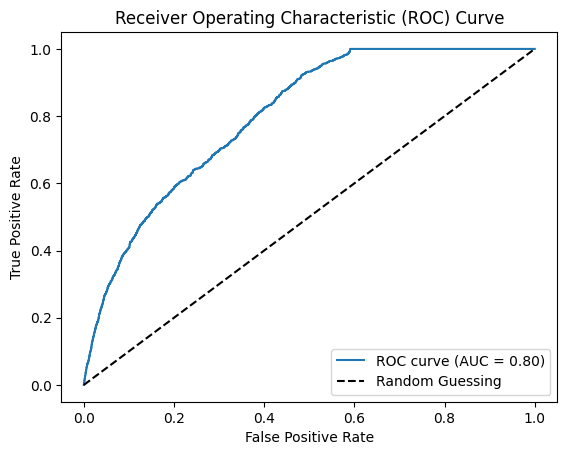

In [110]:

from sklearn.metrics import roc_curve, roc_auc_score

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probabilities of the positive class on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [111]:
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8005228341138261


#### Plot of Coefficients of Variables

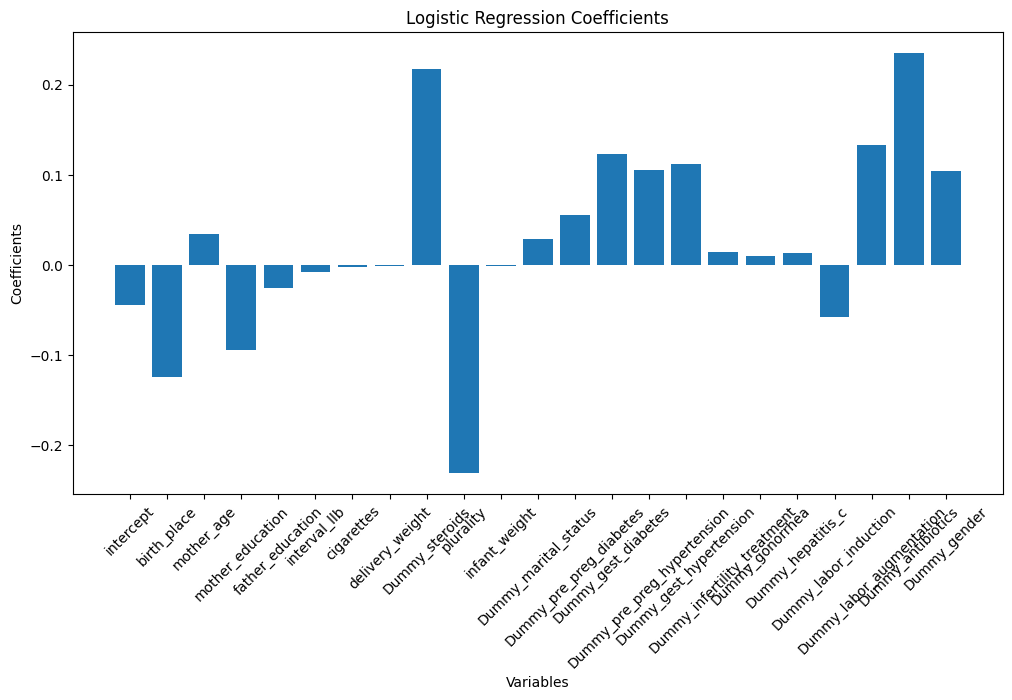

In [115]:
import matplotlib.pyplot as plt

# Define the variable names and corresponding coefficients
variables = ['intercept','birth_place', 'mother_age','mother_education',  'father_education', 'interval_llb',
        'cigarettes', 'delivery_weight', 'Dummy_steroids', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics', 'Dummy_gender']
coefficients = [-0.0440814, -0.12427593, 0.03419068, -0.09472079, -0.02564572, -0.00798864,
  -0.00263918, -0.00114053, 0.21780572, -0.23094571, -0.00077642, 0.02831237,
   0.05589069, 0.12312164, 0.10590176, 0.11250995, 0.01430617, 0.00994238,
   0.01307448, -0.05779718, 0.1335582, 0.23508944, 0.10402321]


plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(variables, coefficients)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.show()



In [122]:
for variable, coefficient in zip(variables, coefficients):
    print(f'{variable}: {coefficient}')


intercept: -0.0440814
birth_place: -0.12427593
mother_age: 0.03419068
mother_education: -0.09472079
father_education: -0.02564572
interval_llb: -0.00798864
cigarettes: -0.00263918
delivery_weight: -0.00114053
Dummy_steroids: 0.21780572
plurality: -0.23094571
infant_weight: -0.00077642
Dummy_marital_status: 0.02831237
Dummy_pre_preg_diabetes: 0.05589069
Dummy_gest_diabetes: 0.12312164
Dummy_pre_preg_hypertension: 0.10590176
Dummy_gest_hypertension: 0.11250995
Dummy_infertility_treatment: 0.01430617
Dummy_gonorrhea: 0.00994238
Dummy_hepatitis_c: 0.01307448
Dummy_labor_induction: -0.05779718
Dummy_labor_augmentation: 0.1335582
Dummy_antibiotics: 0.23508944
Dummy_gender: 0.10402321


In [141]:
# Define the logistic regression coefficients
coefficients = np.array([-0.0440814, -0.12427593, 0.03419068, -0.09472079, -0.02564572, -0.00798864,
                        -0.00263918, -0.00114053, 0.21780572, -0.23094571, -0.00077642, 0.02831237,
                        0.05589069, 0.12312164, 0.10590176, 0.11250995, 0.01430617, 0.00994238,
                        0.01307448, -0.05779718, 0.1335582, 0.23508944, 0.10402321])

# Define the predictor variable values for a specific observation
predictor_values = np.array([1, 1, 30, 12, 14, 0, 5, 2500, 1, 2, 2800, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

# Calculate the linear combination of predictor variables and coefficients
linear_combination = np.dot(predictor_values, coefficients)

# Apply the logistic function to get the predicted probability
predicted_probability = 1 / (1 + np.exp(-linear_combination))

print("Predicted Probability:", predicted_probability)


Predicted Probability: 0.005572228522228519


### Variable Importance (permutation importance method)

In [143]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
classifier = LogisticRegression(random_state=0)

# Fit the model
classifier.fit(X, y)

# Calculate feature importance using permutation importance
perm = PermutationImportance(classifier, random_state=0).fit(X, y)

# Define the feature names
feature_names = ['intercept','birth_place', 'mother_age','mother_education',  'father_education', 'interval_llb',
        'cigarettes', 'delivery_weight', 'Dummy_steroids', 'plurality',
        'infant_weight', 'Dummy_marital_status', 'Dummy_pre_preg_diabetes',
        'Dummy_gest_diabetes', 'Dummy_pre_preg_hypertension',
        'Dummy_gest_hypertension', 'Dummy_infertility_treatment',
        'Dummy_gonorrhea', 'Dummy_hepatitis_c', 'Dummy_labor_induction',
        'Dummy_labor_augmentation', 'Dummy_antibiotics', 'Dummy_gender']

# Plot variable importance
eli5.show_weights(perm, feature_names=feature_names)


Weight,Feature
0.0000 ± 0.0000,delivery_weight
0.0000 ± 0.0000,Dummy_gender
0.0000 ± 0.0000,Dummy_labor_augmentation
0.0000 ± 0.0001,mother_age
0.0000 ± 0.0000,Dummy_gest_diabetes
0.0000 ± 0.0000,Dummy_antibiotics
0.0000 ± 0.0000,Dummy_gest_hypertension
0.0000 ± 0.0000,Dummy_pre_preg_hypertension
0 ± 0.0000,Dummy_steroids
0 ± 0.0000,Dummy_pre_preg_diabetes


### Model Comparison

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define and train the logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

# Define and train the random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Predict on the test set using both models
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for both models
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Print the evaluation metrics for both models
print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-score:", logistic_f1)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Logistic Regression Metrics:
Accuracy: 0.9651849549269506
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Random Forest Metrics:
Accuracy: 0.965150416191759
Precision: 0.375
Recall: 0.0029791459781529296
F1-score: 0.005911330049261085


### Regularization Technique

In [121]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling to the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model with L2 regularization (Ridge)
logistic_l2 = LogisticRegression(penalty='l2', C=1.0)
logistic_l2.fit(X_train_scaled, y_train)

# Create and train the logistic regression model with L1 regularization (Lasso)
logistic_l1 = LogisticRegression(penalty='l1', C=1.0, solver='saga')
logistic_l1.fit(X_train_scaled, y_train)

# Create and train the logistic regression model with Elastic Net regularization
logistic_elastic = LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=0.5, solver='saga')
logistic_elastic.fit(X_train_scaled, y_train)

# Evaluate the models on the test set
l2_accuracy = logistic_l2.score(X_test_scaled, y_test)
l1_accuracy = logistic_l1.score(X_test_scaled, y_test)
elastic_accuracy = logistic_elastic.score(X_test_scaled, y_test)

print("L2 Regularization Accuracy:", l2_accuracy)
print("L1 Regularization Accuracy:", l1_accuracy)
print("Elastic Net Regularization Accuracy:", elastic_accuracy)



L2 Regularization Accuracy: 0.9644251027527372
L1 Regularization Accuracy: 0.9644251027527372
Elastic Net Regularization Accuracy: 0.9644251027527372
